<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/master/Lesson_03_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 5853: Biostatistics**

##### **Module 3: Inference**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)


### Module 3 Material

* Part 3.1: Confidence Intervals
* Part 3.2: Hypothesis Testing
* Part 3.3: Comparison of Two Means
* Part 3.4: Analysis of Variance (ANOVA)
* **Part 3.5: Nonparametric Methods**
* Part 3.6: Inference on Proportions
* Part 3.7: Contingency Tables
* Part 3.8: Correlation
* Part 3.9: Simple Linear Regression
* Part 3.10: Multiple Linear Regression
* Part 3.11: Logistic Regression
* Part 3.12: Survival Analysis

## Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
# YOU MUST RUN THIS CELL FIRST
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# **Part 3.5: Nonparametric Methods**

Nonparametric methods in biostatistics are statistical techniques that do **not** assume a specific distribution for the data. This makes them particularly useful when the data do not meet the assumptions required for parametric methods, such as normality.

#### **Key Features of Nonparametric Methods:**
1. **Fewer Assumptions:** They do not require the data to follow a normal distribution, making them more flexible and robust.
2. **Versatility:** Suitable for small sample sizes and data with outliers or non-ordinal scales.
3. **Examples:** Common nonparametric tests include the Mann-Whitney U test, Kruskal-Wallis test, and the Wilcoxon signed-rank test.

#### **Importance in Biostatistics:**
* **Flexibility:** They can be applied to a wide range of data types and distributions, which is crucial in biological and medical research where data often do not follow a normal distribution.
* **Robustness:** Nonparametric methods are less sensitive to outliers and skewed data, providing more reliable results in such cases.
* **Applicability:** They are essential for analyzing ordinal data or data with ranks, which are common in clinical trials and other biostatistical applications.


### **Introduction**

For all the statistical tests we have studied up to this point, the populations from which the data were sampled were assumed to be at least approximately normally distributed, or the sample sizes were large enough that the central limit theorem could be applied. Normality of the populations is necessary for the tests to be valid. Since the forms of the underlying distributions are assumed to be known and only the values of certain parameters – the means and standard deviations of the normal distributions – are not, these procedures are called parametric tests. If the data do not conform to the assumptions made by such traditional techniques, nonparametric methods of statistical inference can be used instead. 

Nonparametric techniques make fewer assumptions about the nature of the underlying probability distributions. As a result, they are sometimes called distribution-free  methods. Nonparametric tests of hypothesis follow the same general procedure as the parametric tests we have already studied. We begin by making some claim about the underlying populations in the form of a null hypothesis. We calculate a test statistic based on random samples of observations drawn from the underlying populations. We then use the value of the test statistic to determine a _p_ -value, compare the _p_ -value to the significance level of the test $\alpha$, and either reject or fail to reject the null hypothesis ($H_0$). 

>Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 297). CRC Press. Kindle Edition. 

## **Datasets for this Lesson**

In this lesson we will be using 3 datasets that we need to read from the course file server. The first dataset contains the fev1 values that are used in the "**The Problem**" outlined above. Two additional datasets will also be used in this lesson. 

### Example 1: Read Datafile

The code in the cell below uses the Pandas function `pd.read_csv(filename)` to read the data file `centers_fev1.csv` stored on the course HTTPS server https://biologicslab.co. As the file is read, it is stored in a Pandas DataFrame called `fvDF`. 

In [2]:
# Example 1: Read datafile

import pandas as pd

# Read datafile and create DataFrame 
fvDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/centers_fev1.csv",
    index_col=0,
    sep=',',
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 4) 

# Display DataFrame
display(fvDF)

,center,fev1
1,1,3.23
2,1,3.47
3,1,1.86
...,...,...
58,3,2.43
59,3,3.20
60,3,3.53


If the code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_4_image11.png)

Our new DataFrame `fvDF` has total of 60 records of fev1 values in the column **fev1**. This is the to the total volume of air that is forcibly inhaled or exhaled from the lungs within one minute. This measurement is crucial in respiratory physiology as it helps assess lung function and ventilation efficiency.

### **Exercise 1A: Read Datafile**

In the cell below, use the Pandas function `pd.read_csv(filename)` to read a data file called `cystic_fibrosis_fvc.csv` stored on the course HTTPS server https://biologicslab.co. As the file is read, store it in a new Pandas DataFrame called `cfDF`.

**Data Description**




In [3]:
# Insert your code for Exercise 1 here

import pandas as pd

# Read data file
cfDF = pd.read_csv("https://biologicslab.co/BIO5853/data/cystic_fibrosis_fvc.csv",
                    index_col=0,
                    sep=',',
                    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 4) 

# Display DataFrame
display(cfDF)

,subject,placebo,drug,difference
1,1,224,213,11
2,2,80,95,-15
3,3,75,33,42
...,...,...,...,...
12,12,255,10,245
13,13,525,65,460
14,14,1023,343,680


If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image01.png)

### **Exercise 1B: Read Datafile**

In the cell below, use the Pandas function `pd.read_csv(filename)` to read a data file called `REE_diffs.csv` stored on the course HTTPS server https://biologicslab.co. As the file is read, store it in a new Pandas DataFrame called `reeDF`.

#### **Data Description**

This dataset contains the **_resting energy expenditure (REE)_** for patients with cystic fibrosis (CF) and healthy individuals. Resting Energy Expenditure (REE), also known as Resting Metabolic Rate (RMR), is the amount of energy your body needs to maintain basic physiological functions while at rest. These functions include breathing, circulating blood, and cellular processes. REE is a significant component of your total daily energy expenditure, typically accounting for 60-70% of it.

REE can be measured using several methods including indirect calorimetry. This is the most accurate method and involves measuring the amount of oxygen consumed and carbon dioxide produced by the body. This data is then used to calculate energy expenditure. REE is useful in clinical settings to help manage conditions like obesity, malnutrition, and metabolic disorders. Tracking changes in REE can provide insights into metabolic health and the effects of aging, illness, or lifestyle changes.

In [4]:
# Insert your code for Exercise 1B here

import pandas as pd

# Read data file
reeDF = pd.read_csv("https://biologicslab.co/BIO5853/data/REE_cf.csv",
#                    index_col=0,
                    sep=',',
                    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 4) 

# Display DataFrame
display(reeDF)

,Pair,CF,Healthy
0,1,1153,996
1,2,1132,1080
2,3,1165,1182
...,...,...,...
10,11,1793,1632
11,12,1930,1614
12,13,2075,1836


If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image05.png)

### **Exercise 1C: Read Datafile**

In the cell below, use the Pandas function `pd.read_csv(filename)` to read a data file called `mental_age_scores.csv` stored on the course HTTPS server https://biologicslab.co. As the file is read, store it in a new Pandas DataFrame called `mentalDF`.

#### **Data Description**




In [5]:
# Insert your code for Exercise 1B here

import pandas as pd

# Read data file
mentalDF = pd.read_csv("https://biologicslab.co/BIO5853/data/mental_age_scores.csv",
                    index_col=0,
                    sep=',',
                    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 4) 

# Display DataFrame
display(mentalDF)

,score,group,order
1,34.5,Low exposure,1
2,37.5,Low exposure,1
3,39.5,Low exposure,1
...,...,...,...
37,54.0,High exposure,2
38,54.0,High exposure,2
39,55.0,High exposure,2


If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image03.png)

## **Sign Test**

The **_Sign Test_** is a nonparametric statistical method used to evaluate the _median_ of a population or to compare two related samples. It is particularly useful when the assumptions of normality required for parametric tests, such as the _t_ -test, cannot be satisfied.

#### **Key Features of the Sign Test:**
1. **Nonparametric Nature:** It does not assume a specific distribution for the data, making it flexible and robust.
2. **Paired Comparisons:** Often used to compare paired observations, such as measurements before and after a treatment.
3. **Median Focus:** Tests whether the median difference between pairs is zero.

The sign test may be used to compare two populations which are not independent. In this respect, it is similar to the paired _t_ -test. A random sample of paired observations is selected from the two populations of interest. The test then focuses on the difference in values within each pair. However, it does not require that the population of differences be normally distributed. Furthermore, whereas the null hypothesis of the paired _t_ -test is that the mean of the underlying population of differences is equal to 0, the null hypothesis of the sign test is that the median difference is equal to 0. 
>Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 297). CRC Press. Kindle Edition. 

### **Sign Test Example** 

Consider a study designed to investigate the amount of energy expended by patients born with cystic fibrosis. We would like to compare energy expenditure at rest for persons suffering from this disease and for healthy individuals matched to the cystic fibrosis patients on important clinical characteristics. Because the subjects with and without cystic fibrosis are matched, the two groups  are not independent. If differences in resting energy expenditure (ree) within each matched pair are normally distributed, we would be able to assess whether the mean difference is equal to 0 using the  paired t test. If we do not feel it is appropriate to make this assumption, however, we could instead use the sign test to evaluate the null hypothesis  

$$ H_0: \delta_{\text{median}} = 0 $$  

where $\delta_{\text{median}}$ is the median of the population of differences. For a two-sided test, the alternative hypothesis is 

$$ H_0: \delta_{\text{median}} \not= 0 $$  

We will conduct the test at the 0.05 level of significance.  

We begin by selecting a random sample of n pairs of observations from the two populations.  Table 13.1 contains the measurements of `ree` for samples of 13 patients with cystic fibrosis and 13  healthy individuals matched to the patients on age, sex, height, and weight. Using these values, we calculate the difference in ree for each pair of observations. The distribution of these differences is displayed in the histogram in **Figure 13.1**.  

Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 298). CRC Press. Kindle Edition. 
![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image07.png)

**FIGURE 13.1** Differences in resting energy expenditure (ree) for patients with cystic fibrosis and healthy individuals matched on age, sex, height, and weight

### Example 2: Create Histogram

The code below shows how to recreate Example 2 using Python. 

_Code Description:_

This histogram shows the _difference_ in resting energy expenditure (ree) for matched pairs of patients -- one with cystic fibrosis (CF) and one healthy patient. Therefore the difference in `ree` for each pair will be our x-value. Here is the code chunk that generates our x-values:

~~~text
# Data is difference 
x = np.array(reeDF.CF - reeDF.Healthy)
~~~

The rest of the code uses the function `plt.hist()` from the `Matplotlib.pyplot` package to plot the histogram:

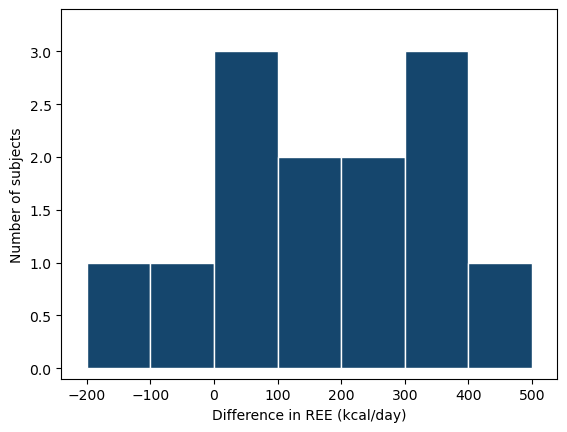

In [6]:
# Example 2: Create histogram

import matplotlib.pyplot as plt
import numpy as np

# Assign values
color_1 = '#15466d'
numBins=7

# Data is difference 
x = np.array(reeDF.CF - reeDF.Healthy)

# Plot histogram
n, bins, patches = plt.hist(x, numBins, density=False, 
                            range=(-200,500),
                            facecolor=color_1,
                            edgecolor="white",
                            align="mid",
                            bottom= 0,
                            alpha=1.0)
# Define x- and y- limits
plt.xlim(-240, 540)
plt.ylim(-0.1, 3.4)
plt.grid(False)

# Add labels and titles
plt.xlabel('Difference in REE (kcal/day)')
plt.ylabel('Number of subjects')

# Show plot
plt.show()

If the code is correct, you should see the following histogram:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image06.png)

From visual inspection, you should see that the distribution is not have the shape of a normal ("bell-shaped") distribution. However, there are only 13 data points plotted in this histogram which isn't really enough to get a good look at the shape of the distribution.

### **Exercise 2: Plot Histogram**

For **Exercise 2** you are to recreate **Figure 13.2** in your textbook on page 303. This figure is a histogram showing the difference in the reduction in forced vital capacity in a sample of patients with cystic fibrosis in a clinical trial testing the effects of the drug `amiloride`. Control patients -- not receiving the drug are in `cfDF.placebo` while patients receiving amiloride are in `cfDF.drug`. 

_Code Hints:_

For the most part you can reuse the code in Example 2 with the following modifications:

1. Obviously, you we need to change the code that generates the x-values.
2. Set `range=(-200,700),`
3. Use the following code for defining the x- and y-limits:
~~~text
plt.xlim(-240, 740)
plt.ylim(-0.1, 6.5)
plt.grid(False)
~~~

4. Change the x-label to read: 'Difference in reduction of forced vital capacity (ml)'


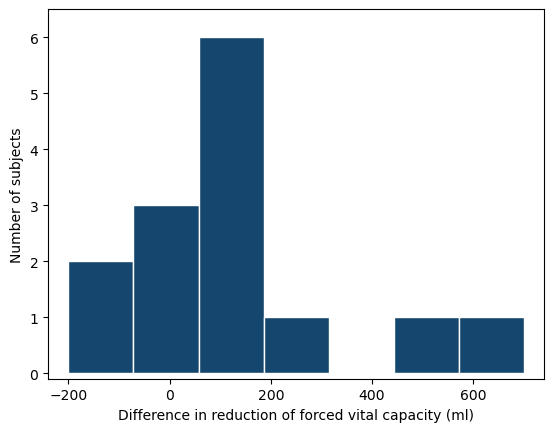

In [7]:
# Insert your code for Exercise 2 here

import matplotlib.pyplot as plt
import numpy as np

# Assign values
color_1 = '#15466d'
numBins=7

# Data is difference 
x = np.array(cfDF.placebo - cfDF.drug)

# Plot histogram
n, bins, patches = plt.hist(x, numBins, density=False, 
                            range=(-200,700),
                            facecolor=color_1,
                            edgecolor="white",
                            align="mid",
                            bottom= 0,
                            alpha=1.0)
# Define x- and y- limits
plt.xlim(-240, 740)
plt.ylim(-0.1, 6.5)
plt.grid(False)

# Add labels and titles
plt.xlabel('Difference in reduction of forced vital capacity (ml)')
plt.ylabel('Number of subjects')

# Show plot
plt.show()

If your code is correct, you should see the following histogram:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image10.png)

Here is the **Figure 13.2** from your textbook:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image16.png)

As you can see the histogram shown in your textbook is not exactly identical to the histogram created with Python. Histograms are especially tricky to recreate exactly since they are so sensitive to how the data is "binned". While it maybe possible achieve a more perfect match with a lot of fiddling with the Python code, it really isn't worth the effort. After all, both histograms basically tell the same "story".  


### Example 3: Sign Test

From page 298 in your textbook:
>Next, if a difference is greater than 0, the pair is assigned a plus sign, indicating that the individual  with cystic fibrosis has the higher `ree`. If the difference is less than 0, the pair receives a minus sign. Here, the healthy subject has the higher ree. Differences of exactly 0 provide no information about  which individual in the pair has a higher resting energy expenditure, and are excluded from the  analysis. When differences are excluded, the sample size n is reduced accordingly.
>
>After assigning the plus and minus signs, we count the number of plus signs in the sample; this  total is denoted by D. Under the null hypothesis that the median difference is equal to 0, we would expect to have equal numbers of plus signs and minus signs. Equivalently, the probability that a particular difference is positive is 0.5, and the probability that the difference is negative is also 0.5. If a plus sign is considered to be a “success,” the _n_ plus and minus signs can be thought of as the outcomes of a Bernoulli random variable with probability of success p = 0.5. The total number of plus signs _D_ is then a binomial random variable with parameters n and p. The mean number of plus signs in a sample of size _n_ is $np = n(0.5) = n/2$, and the standard deviation is $\sqrt{np(1-p)} = \sqrt{\frac{n}{4}}$

Here is the Python code you can use to perform a Sign Test on this data.

In [8]:
# Example 3: Sign Test

import numpy as np
import math
from scipy.stats import binomtest

# Extract data
array1 = np.array(reeDF.CF)
array2 = np.array(reeDF.Healthy)

# Compute n
n = len(array1)

# Compute difference
diff = np.subtract(array1, array2)

# Count positive values
D = np.count_nonzero(diff > 0)

# Compute z+
z_plus = (D - n/2)/(math.sqrt(n/4))

# Perform sign test to find p-value
result = binomtest(D, n, p=0.5, alternative='two-sided')

# Print header
print("----Sign Test ----------------------------")
print(f"Sample size (n) = {n}")
print(f"D = {D} plus signs")
print(f"z_plus = {z_plus:.1f}")
print(f'p-value: {result.pvalue:.4f}')
print(" ")

----Sign Test ----------------------------
Sample size (n) = 13
D = 11 plus signs
z_plus = 2.5
p-value: 0.0225
 


If the code is correct, you should see the following output:

~~~text
----Sign Test ----------------------------
Sample size (n) = 13
D = 11 plus signs
z_plus = 2.5
p-value: 0.0225
~~~

From your textbook page 300:

>This is the p-value of the one-sided hypothesis test; we are considering only “more extreme” values of D which are larger than 6.5. What about values that are smaller than 6.5? For a two-sided test, we would reject the null hypothesis not only when D is too large, but also when it is too small. For the exact test, extreme values smaller than 6.5 are defined as values d with probabilities less than or equal to the probability of the observed outcome D = 11. Equivalently, we look for values d such that  P(D = d) ≤ P(D = 11). Here, P(D = 0) = 0.0001, P(D = 1) = 0.0016, and P(D = 2) = 0.0095. Therefore, **_the p-value of the two-sided test is P(D ≥ 11)+ P(D ≤ 2) = 0.0224._** Once again we  would reject the null hypothesis at the 0.05 level of significance, and conclude that resting energy expenditure is higher among patients with cystic fibrosis.  

The _p_ -value (0.0225) generated by the Python code in Example 3 is essentially the same as the   _p_ -value (0.0224) stated in your textbook.

### **Exercise 3A: Sign Test**

In the cell below, perform a Sign Test on the CF drug trial data. Make `array1` be the values in `cfDF.placebo` and the `array2` be the values in `cfDF.drug`. When you compute the difference make sure to use the following code chunk:

~~~text
# Compute difference
diff = np.subtract(array1, array2)
~~~

In [9]:
# Insert your code for Exercise 3A here

import numpy as np
import math
from scipy.stats import binomtest

# Extract data
array1 = np.array(cfDF.placebo)
array2 = np.array(cfDF.drug)

# Compute n
n = len(array1)

# Compute difference
diff = np.subtract(array1, array2)

# Count positive values
D = np.count_nonzero(diff > 0)

# Compute z+
z_plus = (D - n/2)/(math.sqrt(n/4))

# Perform sign test to find p-value
result = binomtest(D, n, p=0.5, alternative='two-sided')

# Print header
print("----Sign Test ----------------------------")
print(f"Sample size (n) = {n}")
print(f"D = {D} plus signs")
print(f"z_plus = {z_plus:.1f}")
print(f'p-value: {result.pvalue:.4f}')
print(" ")

----Sign Test ----------------------------
Sample size (n) = 14
D = 11 plus signs
z_plus = 2.1
p-value: 0.0574
 


If the code is correct, you should see the following output:

~~~text
----Sign Test ----------------------------
Sample size (n) = 14
D = 11 plus signs
z_plus = 2.1
p-value: 0.0574
~~~

### **Exercise 3B: Sign Test**

In the cell below, repeat your Sign Test on the CF drug trial data. As before, make `array1` be the values in `cfDF.placebo` and `array2` be the values in `cfDF.drug`. However, when you compute the difference make sure to use the following code chunk:

~~~text
# Compute difference
diff = np.subtract(array2, array1)
~~~

In other words, we want to know what happens in a Sign Test if we **_reverse_** the data being subtracted from one another.

In [10]:
# Insert your code for Exercise 3B here

import numpy as np
import math
from scipy.stats import binomtest

# Extract data
array1 = np.array(cfDF.placebo)
array2 = np.array(cfDF.drug)

# Compute n
n = len(array1)

# Compute difference
diff = np.subtract(array2, array1)

# Count positive values
D = np.count_nonzero(diff > 0)

# Compute z+
z_plus = (D - n/2)/(math.sqrt(n/4))

# Perform sign test to find p-value
result = binomtest(D, n, p=0.5, alternative='two-sided')

# Print header
print("----Sign Test ----------------------------")
print(f"Sample size (n) = {n}")
print(f"D = {D} plus signs")
print(f"z_plus = {z_plus:.1f}")
print(f'p-value: {result.pvalue:.4f}')
print(" ")

----Sign Test ----------------------------
Sample size (n) = 14
D = 3 plus signs
z_plus = -2.1
p-value: 0.0574
 


If the code is correct, you should see the following output:

~~~text
----Sign Test ----------------------------
Sample size (n) = 14
D = 3 plus signs
z_plus = -2.1
p-value: 0.0574
~~~

As we would expect, the value of _D_ was reversed. Instead of being `11` as in **Exercise 3A** it is now `3`. But what above our _p_ -value? Does the _p_ -value also change?

The answer is **_NO!_**. We get exactly the same _p_ -value either way. It's good to known that we don't have to worry about what to subtract from what when using the Sign Test.  

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image17.png)

### **Wilcoxon Signed-Rank Test**  

Although the sign test frees us from having to make any assumptions about the underlying distribution of differences, it also ignores some potentially useful information: the magnitude of these differences. For patients with cystic fibrosis and healthy individuals matched on age, sex, height, and weight, a difference in `ree` of 8 kcal/day is counted the same as a different of 472 kcal/day. As a result, the sign test is not often used in practice. Instead, the Wilcoxon signed-rank test can be used to compare two populations that are not independent. Like the sign test – and the paired _t_ -test – the signed-rank test does not consider the measurements sampled from the two populations separately. Instead, it focuses  on the difference in values for each pair of observations. It does not require that the population of these differences be normally distributed. However, it does take into account the magnitudes of the differences as well as their signs. The Wilcoxon signed-rank test is used to evaluate the null hypothesis that in the underlying population of differences among pairs, the median difference is equal to 0. The alternative hypothesis is that the population median difference is not equal to 0. 

$$ Z_T = \frac{T - \mu_T}{\sigma_T} $$

where

$$ \mu_T = \frac{n(n+1)}{4} $$

is the mean sum of ranks and

$$ \sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}} $$

is the standard deviation.

>Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 301). CRC Press. Kindle Edition. 

### Example 4: Wilcoxon signed-rank test

The Python code below shows a step-by-step the solution to a Wilcoxon Signed-Rank Test problem using the cystic fibrosis drug (amiloride) trial dataset stored in the DataFrame `cfDF`.

In [11]:
# Example 4: Wilcoxon signed-rank test

import numpy as np
import math
from scipy.stats import wilcoxon

# Extract data from DataFrame
before = np.array(cfDF.placebo)
after = np.array(cfDF.drug)

# Print header
print("----Wilcoxon Signed-Rank Test ----------------------------")

# Calculate differences
differences = before - after
print("Differences:", differences)

# Calculate absolute differences and ranks
abs_differences = np.abs(differences)
ranks = np.argsort(np.argsort(abs_differences)) + 1
print("Absolute Differences:", abs_differences)
print("Ranks:", ranks)

# Assign signs to the ranks
signed_ranks = ranks * np.sign(differences)
print("Signed Ranks:", signed_ranks)

# Calculate T
W_pos = np.sum(signed_ranks[signed_ranks > 0])
W_neg = np.sum(np.abs(signed_ranks[signed_ranks < 0]))
print("Total Positive Ranks (W+):", W_pos)
print("Total Negative Ranks (W-):", W_neg)
if W_pos > W_neg:
    T = W_neg
else:
    T = W_pos
print(f"Smaller sum (T) = {T}")

# Compute mu_T
n = len(before)
print(f"Sample size (n) = {n}")
mu_T = n*(n + 1)/4
print(f"Mean of T (µT)  = {mu_T}")

# Compute sigma_T
sigma_T = math.sqrt((n*(n + 1) * (2*n + 1) / 24))
print(f"Sigma T (σT) = {sigma_T:.2f}")

# Calculate zT
zT = (T - mu_T)/sigma_T
print(f"Test statistic (zT) = {zT:.2f}")

# Step 5: Perform the Wilcoxon signed-rank test
stat, p_value = wilcoxon(after, before)
print(f"p-value: {p_value:.4f}")


----Wilcoxon Signed-Rank Test ----------------------------
Differences: [  11  -15   42  101  106  113 -152  155  158 -178  185  245  460  680]
Absolute Differences: [ 11  15  42 101 106 113 152 155 158 178 185 245 460 680]
Ranks: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Signed Ranks: [  1  -2   3   4   5   6  -7   8   9 -10  11  12  13  14]
Total Positive Ranks (W+): 86
Total Negative Ranks (W-): 19
Smaller sum (T) = 19
Sample size (n) = 14
Mean of T (µT)  = 52.5
Sigma T (σT) = 15.93
Test statistic (zT) = -2.10
p-value: 0.0353


If the code is correct, you should see the following output:

~~~text
----Wilcoxon Signed-Rank Test ----------------------------
Differences: [  11  -15   42  101  106  113 -152  155  158 -178  185  245  460  680]
Absolute Differences: [ 11  15  42 101 106 113 152 155 158 178 185 245 460 680]
Ranks: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Signed Ranks: [  1  -2   3   4   5   6  -7   8   9 -10  11  12  13  14]
Total Positive Ranks (W+): 86
Total Negative Ranks (W-): 19
Smaller sum (T) = 19
Sample size (n) = 14
Mean of T (µT)  = 52.5
Sigma T (σT) = 15.93
Test statistic (zT) = -2.10
p-value: 0.0353
~~~

The output above matches closely the results shown on pages 301-302 in your textbook.

### **Exercise 4A: Wilcoxon signed-rank test**

For **Exercise 4A** simply copy-and-paste the code from Example 4. To make the code more readable, you are to 'comment out' (i.e. place a # in front) of each print statement, except for the print statements from the header, the test statistic and the p-value. 


In [12]:
# Insert your code for Exercise 4 here

import numpy as np
import math
from scipy.stats import wilcoxon

# Extract data from DataFrame
before = np.array(cfDF.placebo)
after = np.array(cfDF.drug)

# Print header
print("----Wilcoxon Signed-Rank Test ----------------------------")

# Calculate differences
differences = before - after
#print("Differences:", differences)

# Calculate absolute differences and ranks
abs_differences = np.abs(differences)
ranks = np.argsort(np.argsort(abs_differences)) + 1
#print("Absolute Differences:", abs_differences)
#print("Ranks:", ranks)

# Assign signs to the ranks
signed_ranks = ranks * np.sign(differences)
#print("Signed Ranks:", signed_ranks)

# Calculate T
W_pos = np.sum(signed_ranks[signed_ranks > 0])
W_neg = np.sum(np.abs(signed_ranks[signed_ranks < 0]))
#print("Total Positive Ranks (W+):", W_pos)
#print("Total Negative Ranks (W-):", W_neg)
if W_pos > W_neg:
    T = W_neg
else:
    T = W_pos
#print(f"Smaller sum (T) = {T}")

# Compute mu_T
n = len(before)
#print(f"Sample size (n) = {n}")
mu_T = n*(n + 1)/4
#print(f"Mean of T (µT)  = {mu_T}")

# Compute sigma_T
sigma_T = math.sqrt((n*(n + 1) * (2*n + 1) / 24))
#print(f"Sigma T (σT) = {sigma_T:.2f}")

# Calculate zT
zT = (T - mu_T)/sigma_T
print(f"Test statistic (zT) = {zT:.2f}")

# Step 5: Perform the Wilcoxon signed-rank test
stat, p_value = wilcoxon(after, before)
print(f"p-value: {p_value:.4f}")


----Wilcoxon Signed-Rank Test ----------------------------
Test statistic (zT) = -2.10
p-value: 0.0353


If the code is correct, you should see the following output:

~~~text
----Wilcoxon Signed-Rank Test ----------------------------
Test statistic (zT) = -2.10
p-value: 0.0353
~~~

Commenting out lines of code instead of deleting them can be very useful for several reasons:

1. **Debugging:** When troubleshooting, you might want to temporarily disable certain parts of your code to identify where an issue is occurring. Commenting out lines allows you to do this without permanently removing the code.
2. **Documentation:** Comments can serve as documentation for why certain lines of code were written or why they were disabled. This can be helpful for you or other developers who might work on the code in the future.
3. **Version Control:** If you’re experimenting with different approaches, commenting out code allows you to easily revert to the previous version without needing to rewrite it.
4. **Collaboration:** When working in a team, commenting out code can signal to others that a particular section is under review or needs attention, without losing the original code.
5. **Testing:** You might want to test different parts of your code independently. Commenting out sections allows you to isolate and test specific functionalities.
6. **Preservation:** Sometimes, you might not be sure if a piece of code will be needed later. Commenting it out keeps it available for future use without cluttering the active codebase.

### **Exercise 4B: Wilcoxon signed-rank test**

For **Exercise 4B** use your code from **Exercise 4B** to perform a Wilcoxon Signed-Rank Test on the dataset containing the resting energy expenditure (REE) for patients with cystic fibrosis (CF) and healthy individuals (`reeDF`). Assign the variable `before` to `reeDF.Healthy` and the variable `after` to `reeDF.CF`.

In [13]:
# Insert your code for Exercise 4 here

import numpy as np
import math
from scipy.stats import wilcoxon

# Extract data from DataFrame
before = np.array(reeDF.Healthy)
after = np.array(reeDF.CF)

# Print header
print("----Wilcoxon Signed-Rank Test ----------------------------")

# Calculate differences
differences = before - after
#print("Differences:", differences)

# Calculate absolute differences and ranks
abs_differences = np.abs(differences)
ranks = np.argsort(np.argsort(abs_differences)) + 1
#print("Absolute Differences:", abs_differences)
#print("Ranks:", ranks)

# Assign signs to the ranks
signed_ranks = ranks * np.sign(differences)
#print("Signed Ranks:", signed_ranks)

# Calculate T
W_pos = np.sum(signed_ranks[signed_ranks > 0])
W_neg = np.sum(np.abs(signed_ranks[signed_ranks < 0]))
#print("Total Positive Ranks (W+):", W_pos)
#print("Total Negative Ranks (W-):", W_neg)
if W_pos > W_neg:
    T = W_neg
else:
    T = W_pos
#print(f"Smaller sum (T) = {T}")

# Compute mu_T
n = len(before)
#print(f"Sample size (n) = {n}")
mu_T = n*(n + 1)/4
#print(f"Mean of T (µT)  = {mu_T}")

# Compute sigma_T
sigma_T = math.sqrt((n*(n + 1) * (2*n + 1) / 24))
#print(f"Sigma T (σT) = {sigma_T:.2f}")

# Calculate zT
zT = (T - mu_T)/sigma_T
print(f"Test statistic (zT) = {zT:.2f}")

# Step 5: Perform the Wilcoxon signed-rank test
stat, p_value = wilcoxon(after, before)
print(f"p-value: {p_value:.4f}")


----Wilcoxon Signed-Rank Test ----------------------------
Test statistic (zT) = -2.69
p-value: 0.0046


If your code is correct, you should see the following output:

~~~text
----Wilcoxon Signed-Rank Test ----------------------------
Test statistic (zT) = -2.69
p-value: 0.0046
~~~

# Example 5: Wilcoxon Rank-Sums Test

If your code is correct, you should see the following output:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image03.png)

In [14]:
# Example 5: Wilcoxon Rank-Sums test

import numpy as np
import scipy.stats as stats

# Data is the difference values
group1 = np.array(mentalDF.query('group == "Low exposure"')['score'])
group2 = np.array(mentalDF.query('group == "High exposure"')['score'])

# Perform the Wilcoxon rank-sums test
result = stats.ranksums(group1, group2)

# Print header
print("----Wilcoxon Rank-Sums test-------------------------")
print(result)
print(" ")

----Wilcoxon Rank-Sums test-------------------------
RanksumsResult(statistic=1.3240749990746759, pvalue=0.18547813776618916)
 


If the code is correct, you should see the following output:
~~~text
----Wilcoxon Rank-Sums test-------------------------
RanksumsResult(statistic=1.3240749990746759, pvalue=0.18547813776618916)
~~~

Substituting these values into the equation for the test statistic, we have 


$$ z_W = \frac{W - \mu_W}{\sigma_W} = \frac{313 - 360}{35.5} = -1.32 $$

Since p = 2(0.093) = 0.186 is greater than the significance level 0.05, we do not reject the null  hypothesis. The samples do not provide evidence of a difference in median normalized mental age  scores for the two populations of children.  

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image18.png)

## **Wilcoxon Rank Sum Test**  

The Wilcoxon rank sum test – or the mathematically equivalent procedure known as the MannWhitney test – is used to compare two independent populations. Consequently, it is a nonparametric  counterpart of the two-sample _t_ -test. Unlike the _t_ -test, it does not require that the underlying  populations be normally distributed or that their variances be equal. It does, however, assume that  the population distributions have the same general shape. The Wilcoxon rank sum test evaluates the  null hypothesis that the medians of the two independent populations are identical,  

$$ H_0: \text(Median_1) = \text(Median_2) $$

versus the alternative hypothesis that the medians are not the same,  

$$ H_A: \text(Median_1) \not= \text(Median_2) $$  

Consider the distributions of normalized mental age scores for two populations of children  suffering from phenylketonuria (pku). Individuals with this disorder are unable to metabolize the  amino acid phenylalanine. It has been suggested that an elevated level of serum phenylalanine increases a child’s likelihood of mental deficiency, which would lead to lower cognitive ability and a lower normalized mental age score. The members of the first population have average daily serum phenylalanine levels below 10.0 mg/dl and are considered to have low exposure; those in the second  population have average levels above 10.0 mg/dl and are labeled as high exposure. We would like to  compare mental age scores normalized to 48 months for these two groups of children using a test  conducted at the 0.05 level of significance. However, we are not willing to assume that normalized mental age scores are normally distributed in patients with pku.  To analyze this data we will use the **_Wilcoxon Rank-Sum Test_**.

$$ Z_W = \frac{W - \mu_W}{\sigma_W} $$

where

$$ \mu_W = \frac{n_s(n_S + n_L + 1)}{2} $$

is the mean sum of the rank and

$$ \sigma_W = \sqrt{\frac{n_S n_L(n_S + n_L + 1)}{12}} $$

is the standard deviation.

>Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 304). CRC Press. Kindle Edition. 

### Example 5: Wilcoxon Rank-Sums Test

From page 304 in your textbook:

>To carry out the Wilcoxon rank sum test, we select independent random samples from each of the populations of interest. Table 13.3 displays samples taken from the two populations of children with  pku; there are 21 children with low exposure and 18 children with high exposure. We combine the two samples into one large group, order the observations from smallest to largest, and assign a rank to each one. If there are tied observations, we assign an average rank to all measurements  with the same value. Note, for instance, that two of the children in the sample have a normalized mental age score of 37.0 months. Since these observations are fourth and fifth in the ordered list of 39 measurements, we assign an average rank of (4 + 5)/2 = 4.5 to each one. Similarly, three  subjects have a normalized mental age score of 51.0 months; these observations each receive a rank  of (22 + 23 + 24)/3 = 23.  

>The next step in the test is to find the sum of the ranks corresponding to each of the original samples. The smaller of the two sums is denoted by W. Under the null hypothesis that the underlying populations have identical medians, we would expect the ranks to be distributed evenly between the two groups.

The Python code below shows a step-by-step the solution to a Wilcoxon Rank-Sums Test problem using the PKU mental age dataset stored in the DataFrame `mentalDF`.

In [15]:
# Example 5: Wilcoxon Rank-Sums Test

import numpy as np
import math
import scipy.stats as stats
from scipy.stats import rankdata

# Extract data from DataFrame
group1 = np.array(mentalDF.query('group == "Low exposure"')['score'])
group2 = np.array(mentalDF.query('group == "High exposure"')['score'])

# Print header
print("----Wilcoxon Rank-Sums Test ----------------------------")

# Combine data
combined_data = np.concatenate((group1, group2))

# Assign ranks 
ranks = rankdata(combined_data)

# Split the ranks back into the original groups
ranks_group1 = ranks[:len(group1)]
ranks_group2 = ranks[len(group1):]

# Find rank sum
ranks_group1_sum = sum(ranks_group1)
ranks_group2_sum = sum(ranks_group2)
print(f'Sum of rank group 1: {ranks_group1_sum}')
print(f'Sum of rank group 2: {ranks_group2_sum} ')

# Assign small and large group
if ranks_group1_sum < ranks_group2_sum:
    smaller_group = ranks_group1 
    larger_group = ranks_group2
else:
    smaller_group = ranks_group2 
    larger_group = ranks_group1

# Compute W
W = sum(smaller_group)
print(f"Smaller group sum (W) = {W}")

# Compute n_S and n_L
n_S = len(smaller_group)
n_L = len(larger_group)
print(f"Sample size of smaller group (n_S): {n_S}")
print(f"Sample size of larger group (n_L): {n_L}")

# Compute mu_W
mu_W = (n_S * (n_S + n_L + 1) / 2)
print(f"Mean of W (µW) = {mu_W}")

# Compute sigma_T
sigma_W = math.sqrt((n_S * n_L * (n_S + n_L + 1))/12)
print(f"Sigma W (σW) = {sigma_W:.2f}")

# Calculate zW
zW = (W - mu_W)/sigma_W
print(f"Test statistic (zW) = {zW:.2f}")

# Perform the Wilcoxon ranked-sums test
result = stats.ranksums(group1, group2)
print(f"p-value: {result.pvalue:.4f}")         

----Wilcoxon Rank-Sums Test ----------------------------
Sum of rank group 1: 467.0
Sum of rank group 2: 313.0 
Smaller group sum (W) = 313.0
Sample size of smaller group (n_S): 18
Sample size of larger group (n_L): 21
Mean of W (µW) = 360.0
Sigma W (σW) = 35.50
Test statistic (zW) = -1.32
p-value: 0.1855


If the code is correct, you should see the following output:

~~~text
----Wilcoxon Rank-Sums Test ----------------------------
Sum of rank group 1: 467.0
Sum of rank group 2: 313.0 
Smaller group sum (W) = 313.0
Sample size of smaller group (n_S): 18
Sample size of larger group (n_L): 21
Mean of W (µW) = 360.0
Sigma W (σW) = 35.50
Test statistic (zW) = -1.32
p-value: 0.1855

~~~

These are the same results shown in your textbook on pages 306-307 for this problem.

### **Exercise 5: Wilcoxon Rank-Sums Test** 

In the cell below, write the Python code to perform the Wilcoxon Rank-Sums Test on the CF resting energy expenditure (REE) stored in the DataFrame `reeDF`.  Comment out all of the print statements except the header, test statistic and the p-value.

_Code Hints:_

In Example 5, it was necessary to write rather complicated code to extract the `Low exposure` and `High exposure` mental scores since these score were combined into the same column called `group`. This extraction was accomplished using the following code chunk:
~~~text
# Extract data from DataFrame
group1 = np.array(mentalDF.query('group == "Low exposure"')['score'])
group2 = np.array(mentalDF.query('group == "High exposure"')['score'])
~~~

However, you will _not_ need to use this complicated code since the REE data for patients with CF and for healthy individuals are in separate columns--instead, just use this code chunk: 

~~~text
group1 = np.array(reeDF.CF)
group2 = np.array(reeDF.Healthy)
~~~

In [16]:
# Example 5: Wilcoxon Rank-Sums Test

import numpy as np
import math
import scipy.stats as stats
from scipy.stats import rankdata

# Extract data from DataFrame
group1 = np.array(reeDF.CF)
group2 = np.array(reeDF.Healthy)

# Print header
print("----Wilcoxon Rank-Sums Test ----------------------------")

# Combine data
combined_data = np.concatenate((group1, group2))

# Assign ranks 
ranks = rankdata(combined_data)

# Split the ranks back into the original groups
ranks_group1 = ranks[:len(group1)]
ranks_group2 = ranks[len(group1):]

# Find rank sum
ranks_group1_sum = sum(ranks_group1)
ranks_group2_sum = sum(ranks_group2)
#print(f'Sum of rank group 1: {ranks_group1_sum}')
#print(f'Sum of rank group 2: {ranks_group2_sum} ')

# Assign small and large group
if ranks_group1_sum < ranks_group2_sum:
    smaller_group = ranks_group1 
    larger_group = ranks_group2
else:
    smaller_group = ranks_group2 
    larger_group = ranks_group1

# Compute W
W = sum(smaller_group)
#print(f"Smaller group sum (W) = {W}")

# Compute n_S and n_L
n_S = len(smaller_group)
n_L = len(larger_group)
#print(f"Sample size of smaller group (n_S): {n_S}")
#print(f"Sample size of larger group (n_L): {n_L}")

# Compute mu_W
mu_W = (n_S * (n_S + n_L + 1) / 2)
#print(f"Mean of W (µW) = {mu_W}")

# Compute sigma_T
sigma_W = math.sqrt((n_S * n_L * (n_S + n_L + 1))/12)
#print(f"Sigma W (σW) = {sigma_W:.2f}")

# Calculate zW
zW = (W - mu_W)/sigma_W
print(f"Test statistic (zW) = {zW:.2f}")

# Step Perform the Wilcoxon ranked-sums test
result = stats.ranksums(group1, group2)
print(f"p-value: {result.pvalue:.4f}")         

----Wilcoxon Rank-Sums Test ----------------------------
Test statistic (zW) = -1.62
p-value: 0.1062


If the code is correct, you should see the following output:
~~~text
----Wilcoxon Rank-Sums Test ----------------------------
Test statistic (zW) = -1.62
p-value: 0.1062
~~~

## **Mann Whitney U Test**

The Mann-Whitney U test (also known as the Wilcoxon rank-sum test) is a non-parametric statistical test used to determine if there is a significant difference between two independent groups. It’s particularly useful when the data doesn’t follow a normal distribution or when sample sizes are small.

Here’s a brief overview of how it works:

1. **Ranks the Data:** All observations from both groups are combined and ranked.
2. **Calculates the U Statistic:** The test then calculates the U statistic based on these ranks.
3. **Compares Distributions:** It assesses whether the distributions of the two groups differ significantly.

This test is often used in place of the two-sample _t_ -test when the assumptions of the _t_ -test (like normality) are not met.


### Example 6: Mann Whitney U Test vs Wilcoxon Rank-Sum Test

The Mann Whitney U Test and the Wilcoxon Rank-Sum Test are suppose to be "mathematically" equivalent. In Example 6 we compare the results obtained by both nonparametric tests on the same dataset stored in the DataFrame `mentalDF`.

In [17]:
# Example 6: 6: Mann Whitney U vs Wilcoxon Rank-Sums Test

import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

# Extract data from DataFrame
group1 = np.array(mentalDF.query('group == "Low exposure"')['score'])
group2 = np.array(mentalDF.query('group == "High exposure"')['score'])

# Print header
print("----Mann Whitney U Test v Wilcoxon Ranked-Sums Rest----------------------------")

# Perform Mann Whitney and Wilcoxon ranked-sums tests
stat, p_value = mannwhitneyu(group1, group2)  # Mann Whitney U test
result_Wilcoxon = stats.ranksums(group1, group2)  # Wilcoxon Rank-Sum Test

# Print resutls
print(f"Mann Whitney U Test: {result_Wilcoxon}")  
print(f"Wilcoxon Ranked-Sums: {result_Wilcoxon}")         

----Mann Whitney U Test v Wilcoxon Ranked-Sums Rest----------------------------
Mann Whitney U Test: RanksumsResult(statistic=1.3240749990746759, pvalue=0.18547813776618916)
Wilcoxon Ranked-Sums: RanksumsResult(statistic=1.3240749990746759, pvalue=0.18547813776618916)


If the code is correct, you should see the following output:

~~~text
----Mann Whitney U Test v Wilcoxon Ranked-Sums Rest----------------------------
Mann Whitney U Test: RanksumsResult(statistic=1.3240749990746759, pvalue=0.18547813776618916)
Wilcoxon Ranked-Sums: RanksumsResult(statistic=1.3240749990746759, pvalue=0.18547813776618916)

~~~

The results from the two tests are identical.

### **Exercise 6: Mann Whitney U vs Wilcoxon Rank-Sums Test** 

In the cell below, write the Python code to perform both the Mann Whitney U Test and Wilcoxon Rank-Sums Test on the CF resting energy expenditure (REE) stored in the DataFrame `reeDF`. Use the code in Example 6 as basic template but use your code in **Exercise 5** for extracting `group1` and `group2` from the DataFrame `reeDF`. 

In [18]:
# Insert your code for Exercise 6 here

import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

# Extract data from DataFrame
# Extract data from DataFrame
group1 = np.array(reeDF.CF)
group2 = np.array(reeDF.Healthy)

# Print header
print("----Mann Whitney U Test v Wilcoxon Ranked-Sums Rest----------------------------")

# Perform Mann Whitney and Wilcoxon ranked-sums tests
stat, p_value = mannwhitneyu(group1, group2)  # Mann Whitney U test
result_Wilcoxon = stats.ranksums(group1, group2)  # Wilcoxon Rank-Sum Test

# Print resutls
print(f"Mann Whitney U Test: {result_Wilcoxon}")  
print(f"Wilcoxon Ranked-Sums: {result_Wilcoxon}")         

----Mann Whitney U Test v Wilcoxon Ranked-Sums Rest----------------------------
Mann Whitney U Test: RanksumsResult(statistic=1.6153846153846154, pvalue=0.10622742978000406)
Wilcoxon Ranked-Sums: RanksumsResult(statistic=1.6153846153846154, pvalue=0.10622742978000406)


If the code is correct, you should see the following output:

~~~text
----Mann Whitney U Test v Wilcoxon Ranked-Sums Rest----------------------------
Mann Whitney U Test: RanksumsResult(statistic=1.6153846153846154, pvalue=0.10622742978000406)
Wilcoxon Ranked-Sums: RanksumsResult(statistic=1.6153846153846154, pvalue=0.10622742978000406)
~~~

As in Example 6, the results from the two tests are identical.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image11.png)

## **Kruskal-Wallis Test**  

The **_Kruskal-Wallis_** test is an extension of the Wilcoxon rank-sum test which can be used to compare three or more independent populations. It is the nonparametric counterpart to the one-way analysis of variance, but does not require that the underlying populations be normally distributed or that their variances be equal. Like the Wilcoxon rank sum test, it does assume that the _k_ populations being compared all have the same basic shape. The Kruskal-Wallis test evaluates the null hypothesis that the medians of the _k_ populations are identical. The alternative hypothesis is that at least one of the population medians differs from one of the others.  

In Chapter 12, we used one-way analysis of variance (ANOVA) to compare pulmonary function at the time of study enrollment for males with coronary artery disease recruited from three different medical centers. We wanted to determine whether patients from these institutions were in fact comparable before combining them for analysis. We assumed that forced expiratory volume in 1 second (`fev1`) was approximately normally distributed, and tested the null hypothesis that mean fev1 was identical  for males with coronary artery disease at each of the k = 3 centers. With a _p_ -value between 0.05 and 0.10 (p = 0.052, using Stata), we were strictly unable to reject the null hypothesis that mean  pulmonary function is identical at the three centers at the 0.05 level of significance.  

What if we do not wish to assume that measurements of fev1 are normally distributed? In this  case, we could use the Kruskal-Wallis test to evaluate the null hypothesis that the medians of the three independent populations are all equal to each other,  

$$ H_0: \text{Median}_1 = \text{Median}_2 = \text{Median}_3. $$ 

The values of fev1 from Table 12.1 – representing independent random samples of males from each  of the three medical centers – are reproduced in Table 13.4. To conduct the test, we follow the  same procedure used for the Wilcoxon rank sum test. We begin by combining the three samples into  one large group, ordering the observations from smallest to largest, and assigning a rank to each one.  Tied observations receive the same average rank. We then find the sum of the ranks corresponding  to each of the original samples, and label these R1 for the first sample, R2 for the second sample,  and R3 for the third sample. Under the null hypothesis that the underlying populations have identical  medians, we expect the ranks to be distributed randomly among the three groups, and the average  ranks to be approximately equal. For a comparison of k independent populations, we test the null  hypothesis by calculating the statistic  

$$ H = \frac{12}{n(n+1)} \sum_{i=1}^{k} \frac{R_i^2}{n_i} - 3(n+1) $$

where _n_ is the sum of the individual sample sizes $n_1 + n_2 +...+ _k$ and _k_ is the number of groups

>Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 307). CRC Press. Kindle Edition. 

### Example 7: Kruskal-Wallis Test

The code in the cell below simply extracts the three data groups from the DataFrame `fvDF` and then performs the Kruskal-Wallis test without showing any intermediate steps.  

In [19]:
# Example 7: Kruskal-Wallis test 

import numpy as np
import scipy.stats as stats

# Data is the difference values
group1 = np.array(fvDF.query('center == 1')['fev1'])
group2 = np.array(fvDF.query('center == 2')['fev1'])
group3 = np.array(fvDF.query('center == 3')['fev1'])

# Perform the Wilcoxon signed-rank test
result = stats.kruskal(group1, group2, group3)

# Print header
print("----Kruskal-Wallis test-------------------------------------")
print(result)
print(" ")

----Kruskal-Wallis test-------------------------------------
KruskalResult(statistic=6.000496084515687, pvalue=0.04977472060246168)
 


If the code is correct, you should see the following output:

~~~text
----Kruskal-Wallis test-------------------------------------
KruskalResult(statistic=6.000496084515687, pvalue=0.04977472060246168)
~~~

This result is the same as that reported in your textbook on page 308:

>If the null hypothesis is true, this test statistic follows a chi-square distribution with _k_ −1 = 3−1 = 2 degrees of freedom. The value 5.99 is the 95th percentile of this probability distribution, so the  p-value is just slightly below 0.05 (p = 0.0498 in Stata) and we reject the null hypothesis. We have evidence that median fev1 differs among the medical centers. 

>(Note that in instances of borderline statistical significance, two different hypothesis tests can in fact lead to different conclusions; using one-way analysis of variance we found p = 0.052, but with the Kruskal-Wallis test p = 0.0498. These p-values are very similar, but one leads us to reject $H_0$ at the 0.05 level of significance while the other does not.)

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image19.png)

## **Chi-Square Distributions**

The probability distribution of the Kruskal-Wallis test statistic is a chi-square (χ2) distribution with k − 1 degrees of freedom. Like the _F_ distribution, the chi-square distribution is not symmetric. A chi-square random variable cannot be negative; it assumes values from zero to infinity and is skewed to the right. As is true for all probability distributions, however, the total area beneath the curve is equal to one. Like the _t_ and _F_ distributions, there is a different chi-square distribution for each possible value of the degrees of freedom. The distributions with small degrees of freedom are highly skewed; as the number of degrees of freedom increases, the distributions become less skewed and more symmetric. This is illustrated in **Figure 13.4**.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image12.png)

**FIGURE 13.4**  Chi-square distributions with 1 and 6 degrees of freedom 

### Example 8: Plot Chi-Square Distributions

The code in the cell below shows how to recreate **Figure 13.4** using Python.

_Code Description:_


The statistical package `scipy.stats` is used to generate chi-square distributions using this code chunk:

~~~text
# Values
x = np.linspace(0, 20, 1000)
chi2_1df = chi2.pdf(x, df=1)
chi2_6df = chi2.pdf(x, df=6)
~~~

The remaining code is very similar to the code used previously to plot other distributions.

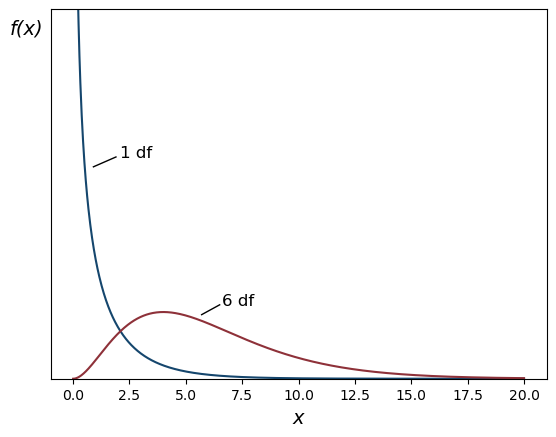

In [20]:
# Example 7: Plot Chi-Square distributions

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Set variables
color_1 = '#15466d' # Dark blue
color_2 = '#8e3139' # Dark red

# Values
x = np.linspace(0, 20, 1000)
chi2_1df = chi2.pdf(x, df=1)
chi2_6df = chi2.pdf(x, df=6)

# Plotting
plt.figure()
plt.plot(x, chi2_1df, color=color_1)
plt.plot(x, chi2_6df, color=color_2)
plt.xlabel('x', fontsize=14, style='italic')

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Sety y limits
plt.ylim(0, 0.75)

# Plot text f(x)
plt.text(-2.8, 0.7, 'f(x)', fontsize=14, style='italic') 

# Plot text 
plt.text(2.10, 0.45, '1 df', fontsize=12)
# Plot text '6 df'
plt.text(6.6, 0.15, '6 df', fontsize=12)

# Define line coord
# line '1 df'
x_line1=[1.90, 0.90]
y_line1=[0.45, 0.43]

# line2 '6 df'
x_line2=[6.5, 5.7]
y_line2=[0.15, 0.13]

# Plot lines
plt.plot(x_line1, y_line1, 
         x_line2, 
         y_line2, 
         color='k', 
         linestyle='solid', 
         linewidth=1.0)

# Show plot
plt.show()

If the code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image13.png)

As mentioned in your textbook, chi-square distributions with very small degrees of freedom are right-skewed as can be seen above. 

### **Exercise 8: Plot Chi-Square Distributions**

In the cell below, repeat Example 8 but plot 8 and 20 degrees of freedom.

_Code Hints:_

1. Use this code chunk to generate your chi-square distributions:

~~~text
# Values
x = np.linspace(0, 40, 1000)
chi2_1df = chi2.pdf(x, df=8)
chi2_6df = chi2.pdf(x, df=20)
~~~

2. Set the y limits to `0, 12`.

3. Use these code chunks to label your chi-square distributions:

~~~text
# Plot text f(x)
plt.text(-5.40, 0.11, 'f(x)', fontsize=14, style='italic') 

# Plot text '8 df'
plt.text(12.6, 0.09, '8 df', fontsize=12)
# Plot text '20 df'
plt.text(27.00, 0.05, '20 df', fontsize=12)


# Define line coord
# line '8 df'
x_line1=[12.38, 9.85]
y_line1=[0.09, 0.085]

# line2 '20 df'
x_line2=[26.5, 24.7]
y_line2=[0.05, 0.045]
~~~

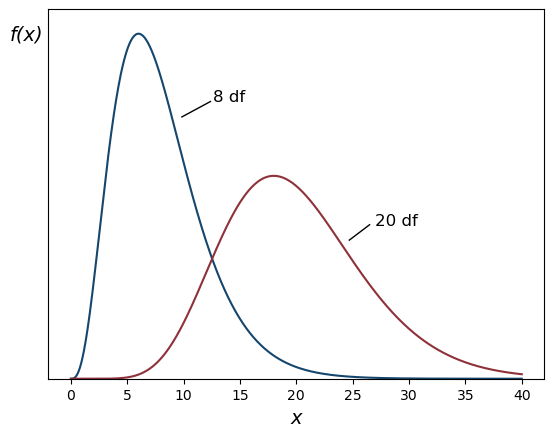

In [21]:
# Insert your code for Exercise 7 here

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Set variables
color_1 = '#15466d' # Dark blue
color_2 = '#8e3139' # Dark red

# Values
x = np.linspace(0, 40, 1000)
chi2_1df = chi2.pdf(x, df=8)
chi2_6df = chi2.pdf(x, df=20)

# Plotting
plt.figure()
plt.plot(x, chi2_1df, color=color_1)
plt.plot(x, chi2_6df, color=color_2)
plt.xlabel('x', fontsize=14, style='italic')

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Sety y limits
plt.ylim(0, 0.12)

# Plot text f(x)
plt.text(-5.40, 0.11, 'f(x)', fontsize=14, style='italic') 

# Plot text '8 df'
plt.text(12.6, 0.09, '8 df', fontsize=12)
# Plot text '20 df'
plt.text(27.00, 0.05, '20 df', fontsize=12)


# Define line coord
# line '8 df'
x_line1=[12.38, 9.85]
y_line1=[0.09, 0.085]

# line2 '20 df'
x_line2=[26.5, 24.7]
y_line2=[0.05, 0.045]

# Plot lines
plt.plot(x_line1, y_line1, 
         x_line2, 
         y_line2, 
         color='k', 
         linestyle='solid', 
         linewidth=1.0)

# Show plot
plt.show()

If your code is correct, you should see the following plot:

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image14.png)

Again we see that increasing the degrees of freedom makes the chi-square distribution more, and more symmetrical. By the time we get to `df=20` the distribution has been almost the same shape of a normal distribution, although a small right-skew is still detectable.


![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_5_image15.png)

## **Advantages and Disadvantages of Nonparametric Methods**  

Nonparametric techniques have several **_advantages_** over traditional methods of statistical inference. One advantage is that they do not require all the restrictive assumptions characteristic of parametric tests. It is not necessary that the underlying populations be normally distributed, for instance. At most, when two or more independent populations are being compared they should have the same basic shape. Their use of ranks makes nonparametric techniques less sensitive to measurement error than traditional tests. They can also be applied to ordinal or discrete data, in addition to continuous measurements. Since it does not make sense to calculate either a mean or a standard deviation for  ordinal values, parametric tests are usually not appropriate.  

Nonparametric methods also have **_disadvantages_**. If the assumptions underlying a parametric test are satisfied, the nonparametric test is less powerful than the comparable parametric technique. This means that if the null hypothesis is false, the nonparametric test would require a larger sample to provide sufficient evidence to reject it. This loss of power is not substantial, however. If the  sample data do come from an underlying normal population, the power of the Wilcoxon tests is approximately 95% of that for the _t_ tests. In other words, if the _t_ test requires 19 observations to achieve a particular level of power, the Wilcoxon test would need 20 observations to have the same power. Another disadvantage is that the hypotheses tested by nonparametric techniques tend to be less specific than those tested by traditional methods, focusing on medians rather than means. Because they rely on ranks rather than on the actual values of the observations, nonparametric tests do not use all the information known about a distribution.

>Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 311). CRC Press. Kindle Edition. 

## **Lesson Turn-in**

When you have completed and run all of the code cells, create a PDF of your notebook and upload the **_PDF_** to your Lesson_03_5 assignment in Canvas for grading.
